# [Credit Card Fraud Detection - Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)

## Dataset documentation
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML

Please cite: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

#### Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
import olac_path
olac_path.set_path(2)

#### Load dataset

In [8]:
# overview of the data directory
!ls -la data/raw

total 1815112
drwxr-xr-x  10 rurlus  staff        320 Apr 15 10:43 .
drwxr-xr-x   7 rurlus  staff        224 Apr 15 00:59 ..
-rw-r--r--@  1 rurlus  staff       6148 Apr 13 18:30 .DS_Store
-rw-r--r--@  1 rurlus  staff     338195 Apr 13 15:45 PCard Transactions 15-16.csv
-rw-r--r--   1 rurlus  staff  493534783 Apr 15 10:43 PS_20174392719_1491204439457_log.csv
-rw-r--r--   1 rurlus  staff     162265 Apr 15 00:59 cf_arff_documentation.txt
-rw-r--r--   1 rurlus  staff  150828752 Apr 15 10:42 creditcard.csv
-rw-r--r--   1 rurlus  staff   69155632 Apr 15 10:42 creditcardfraud.zip
drwxr-xr-x   3 rurlus  staff         96 Apr 15 00:59 data_berka
-rw-r--r--   1 rurlus  staff  190835595 Apr 15 10:43 paysim1.zip


In [9]:
path = 'data/raw/creditcard.csv'
df = pd.read_csv(path)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [11]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

## Descriptive statistics

In [68]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

           ...                 V21           V22           V23           V24  \
count      ...        2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean       ...        1.656562e-16 -3.444850e-16  2.578648e-16  4.471968e-15   
std        ...        7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min        ...       -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%        ...       -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%        ...       -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%        ...        1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max        ...        2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.687098e-15 -3.666453e-16 -1.220404e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

#### Observations

* There are no missing values
* The feature columns are normalised prior to PCA hence we expend to see $\mu_{i} \pm \epsilon_{i} = 0$ for $i \in [1, 28]$.
* The standard deviation exhibits a downward trend as the feature number increases
* The pairplot does not indicate any strong remaining relations

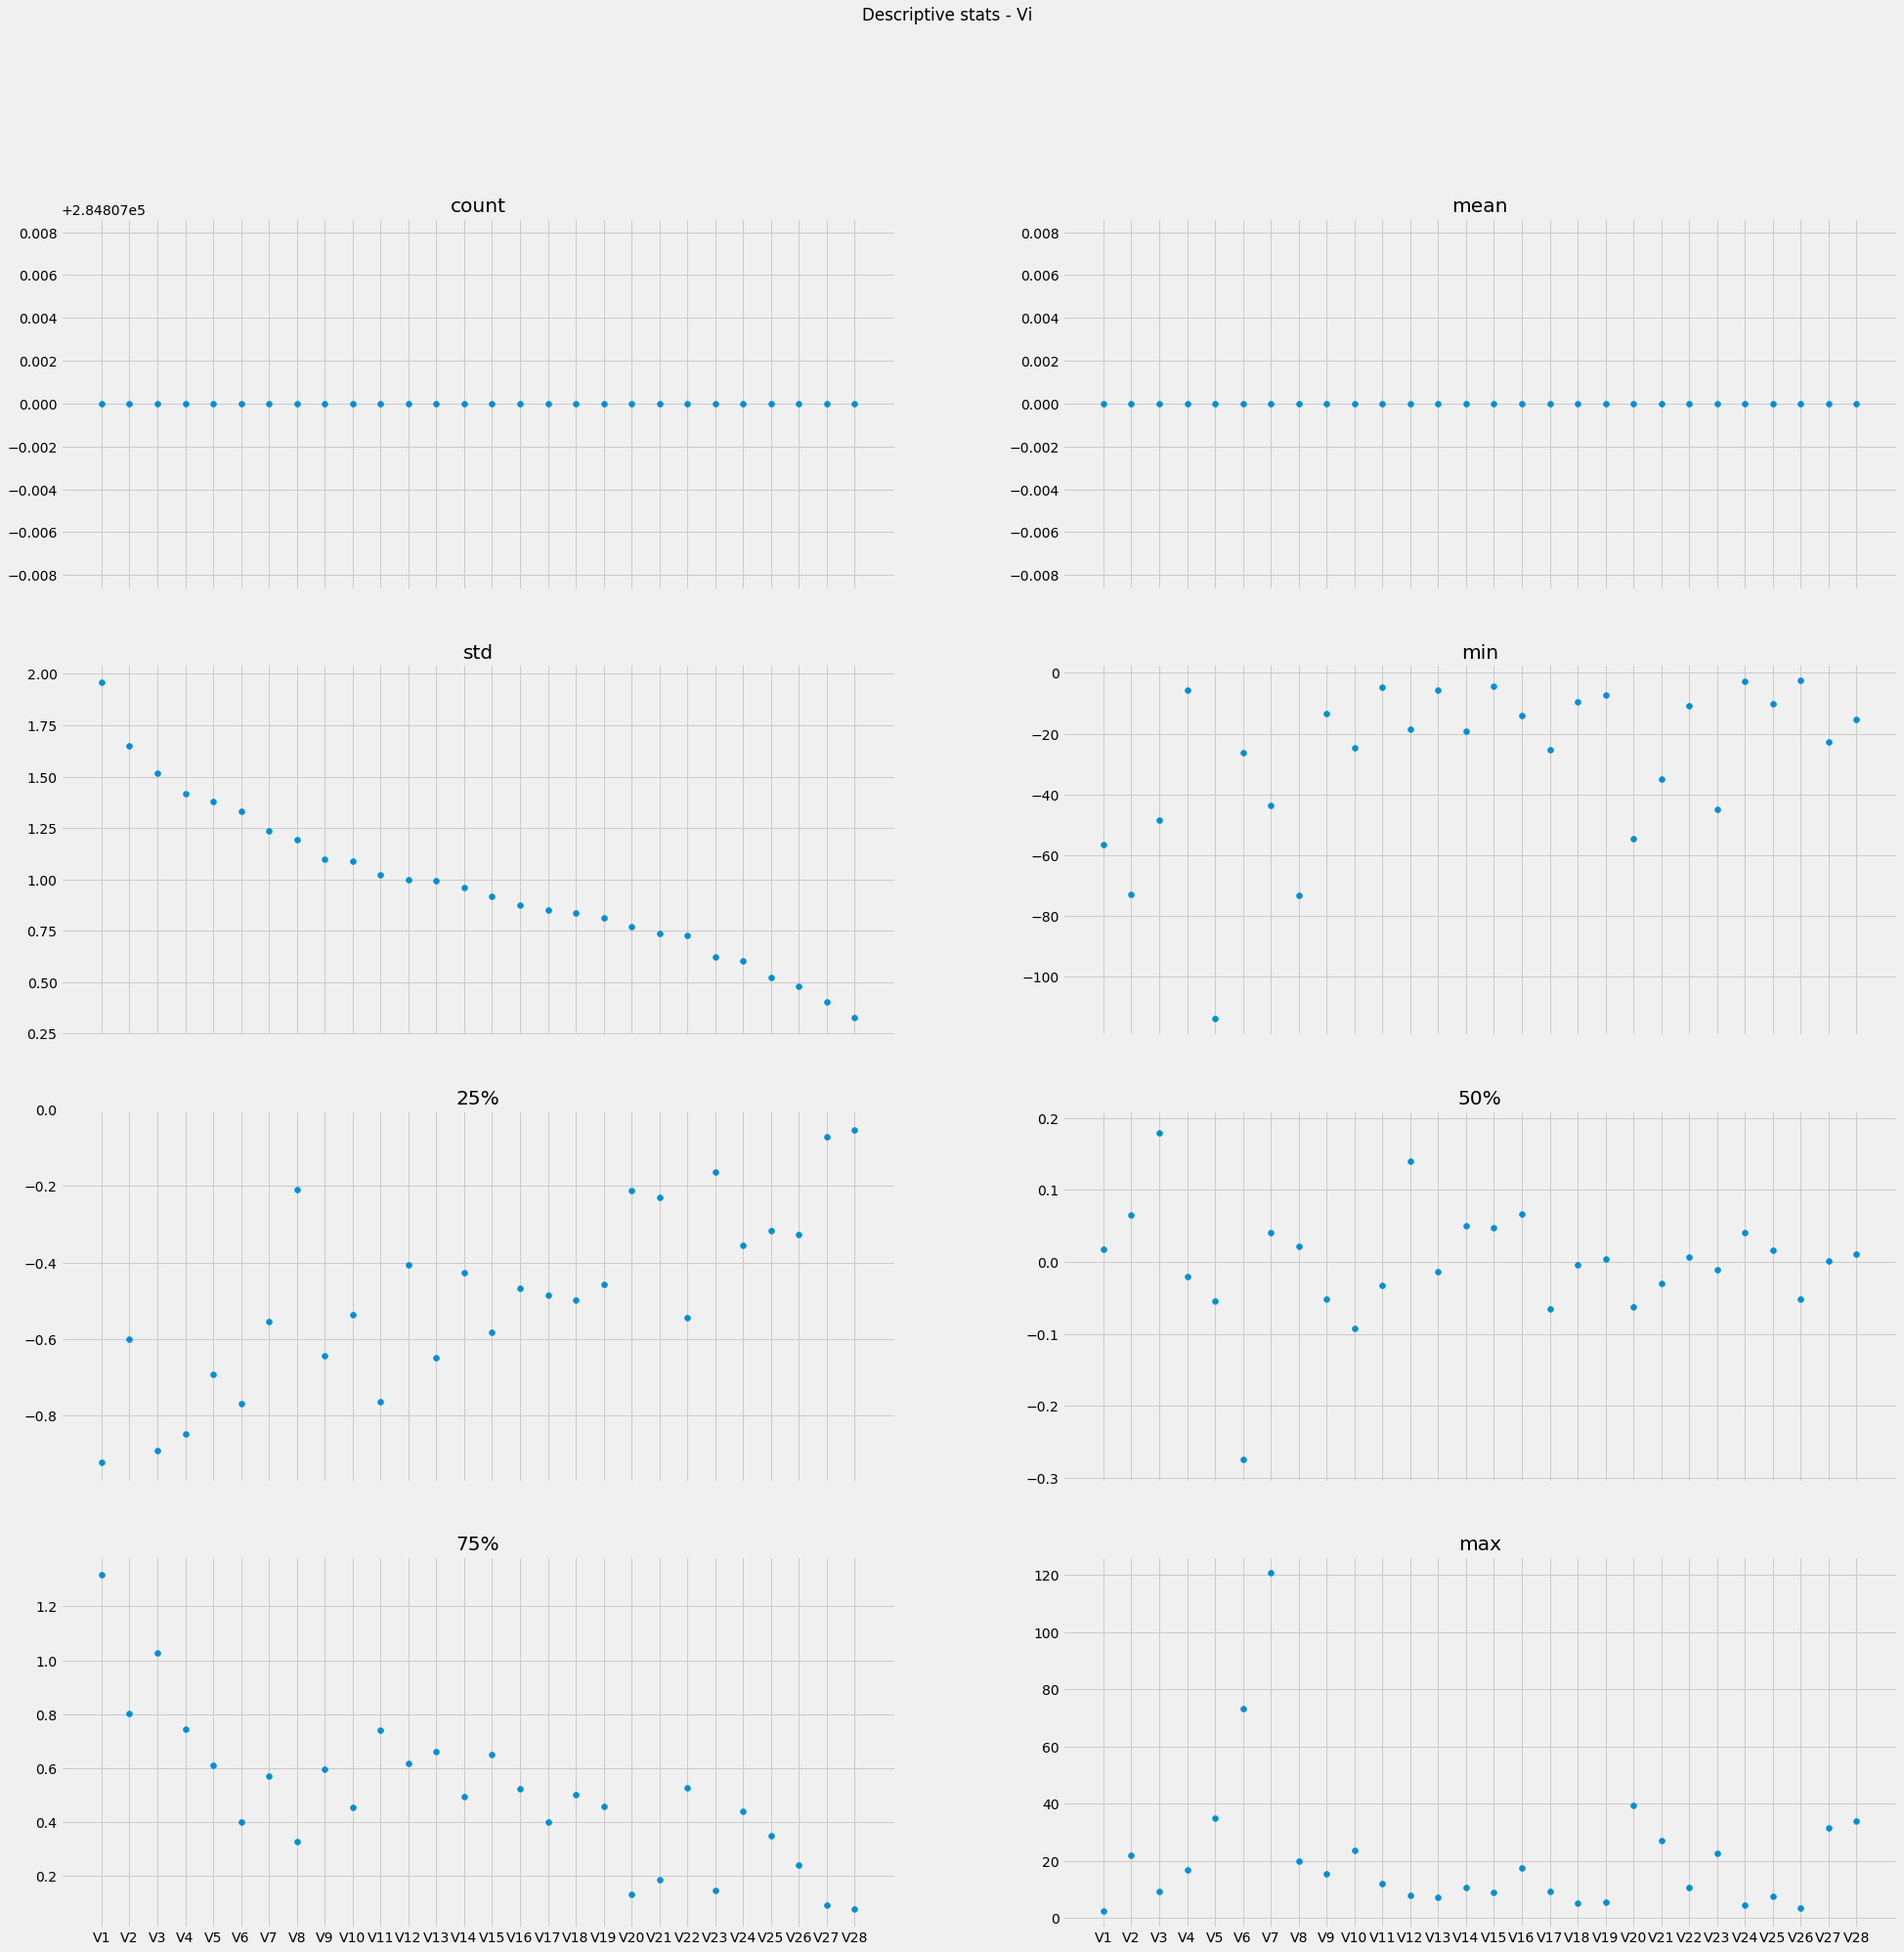

In [67]:
i = np.repeat([0, 1, 2, 3], 2)
j = [0, 1] * 4
fig, ax = plt.subplots(4, 2, figsize=(30, 30), sharex=True)
descr = df.drop(['Time', 'Amount', 'Class'], 1).describe()
x = descr.columns.values
for k in range(8):
    ax[i[k], j[k]].scatter(x, descr.iloc[k, :], label=x[k])
    ax[i[k], j[k]].set_title(descr.index.values[k])
plt.suptitle('Descriptive stats - Vi');

#### Sample pairplot

<Figure size 2160x2160 with 0 Axes>

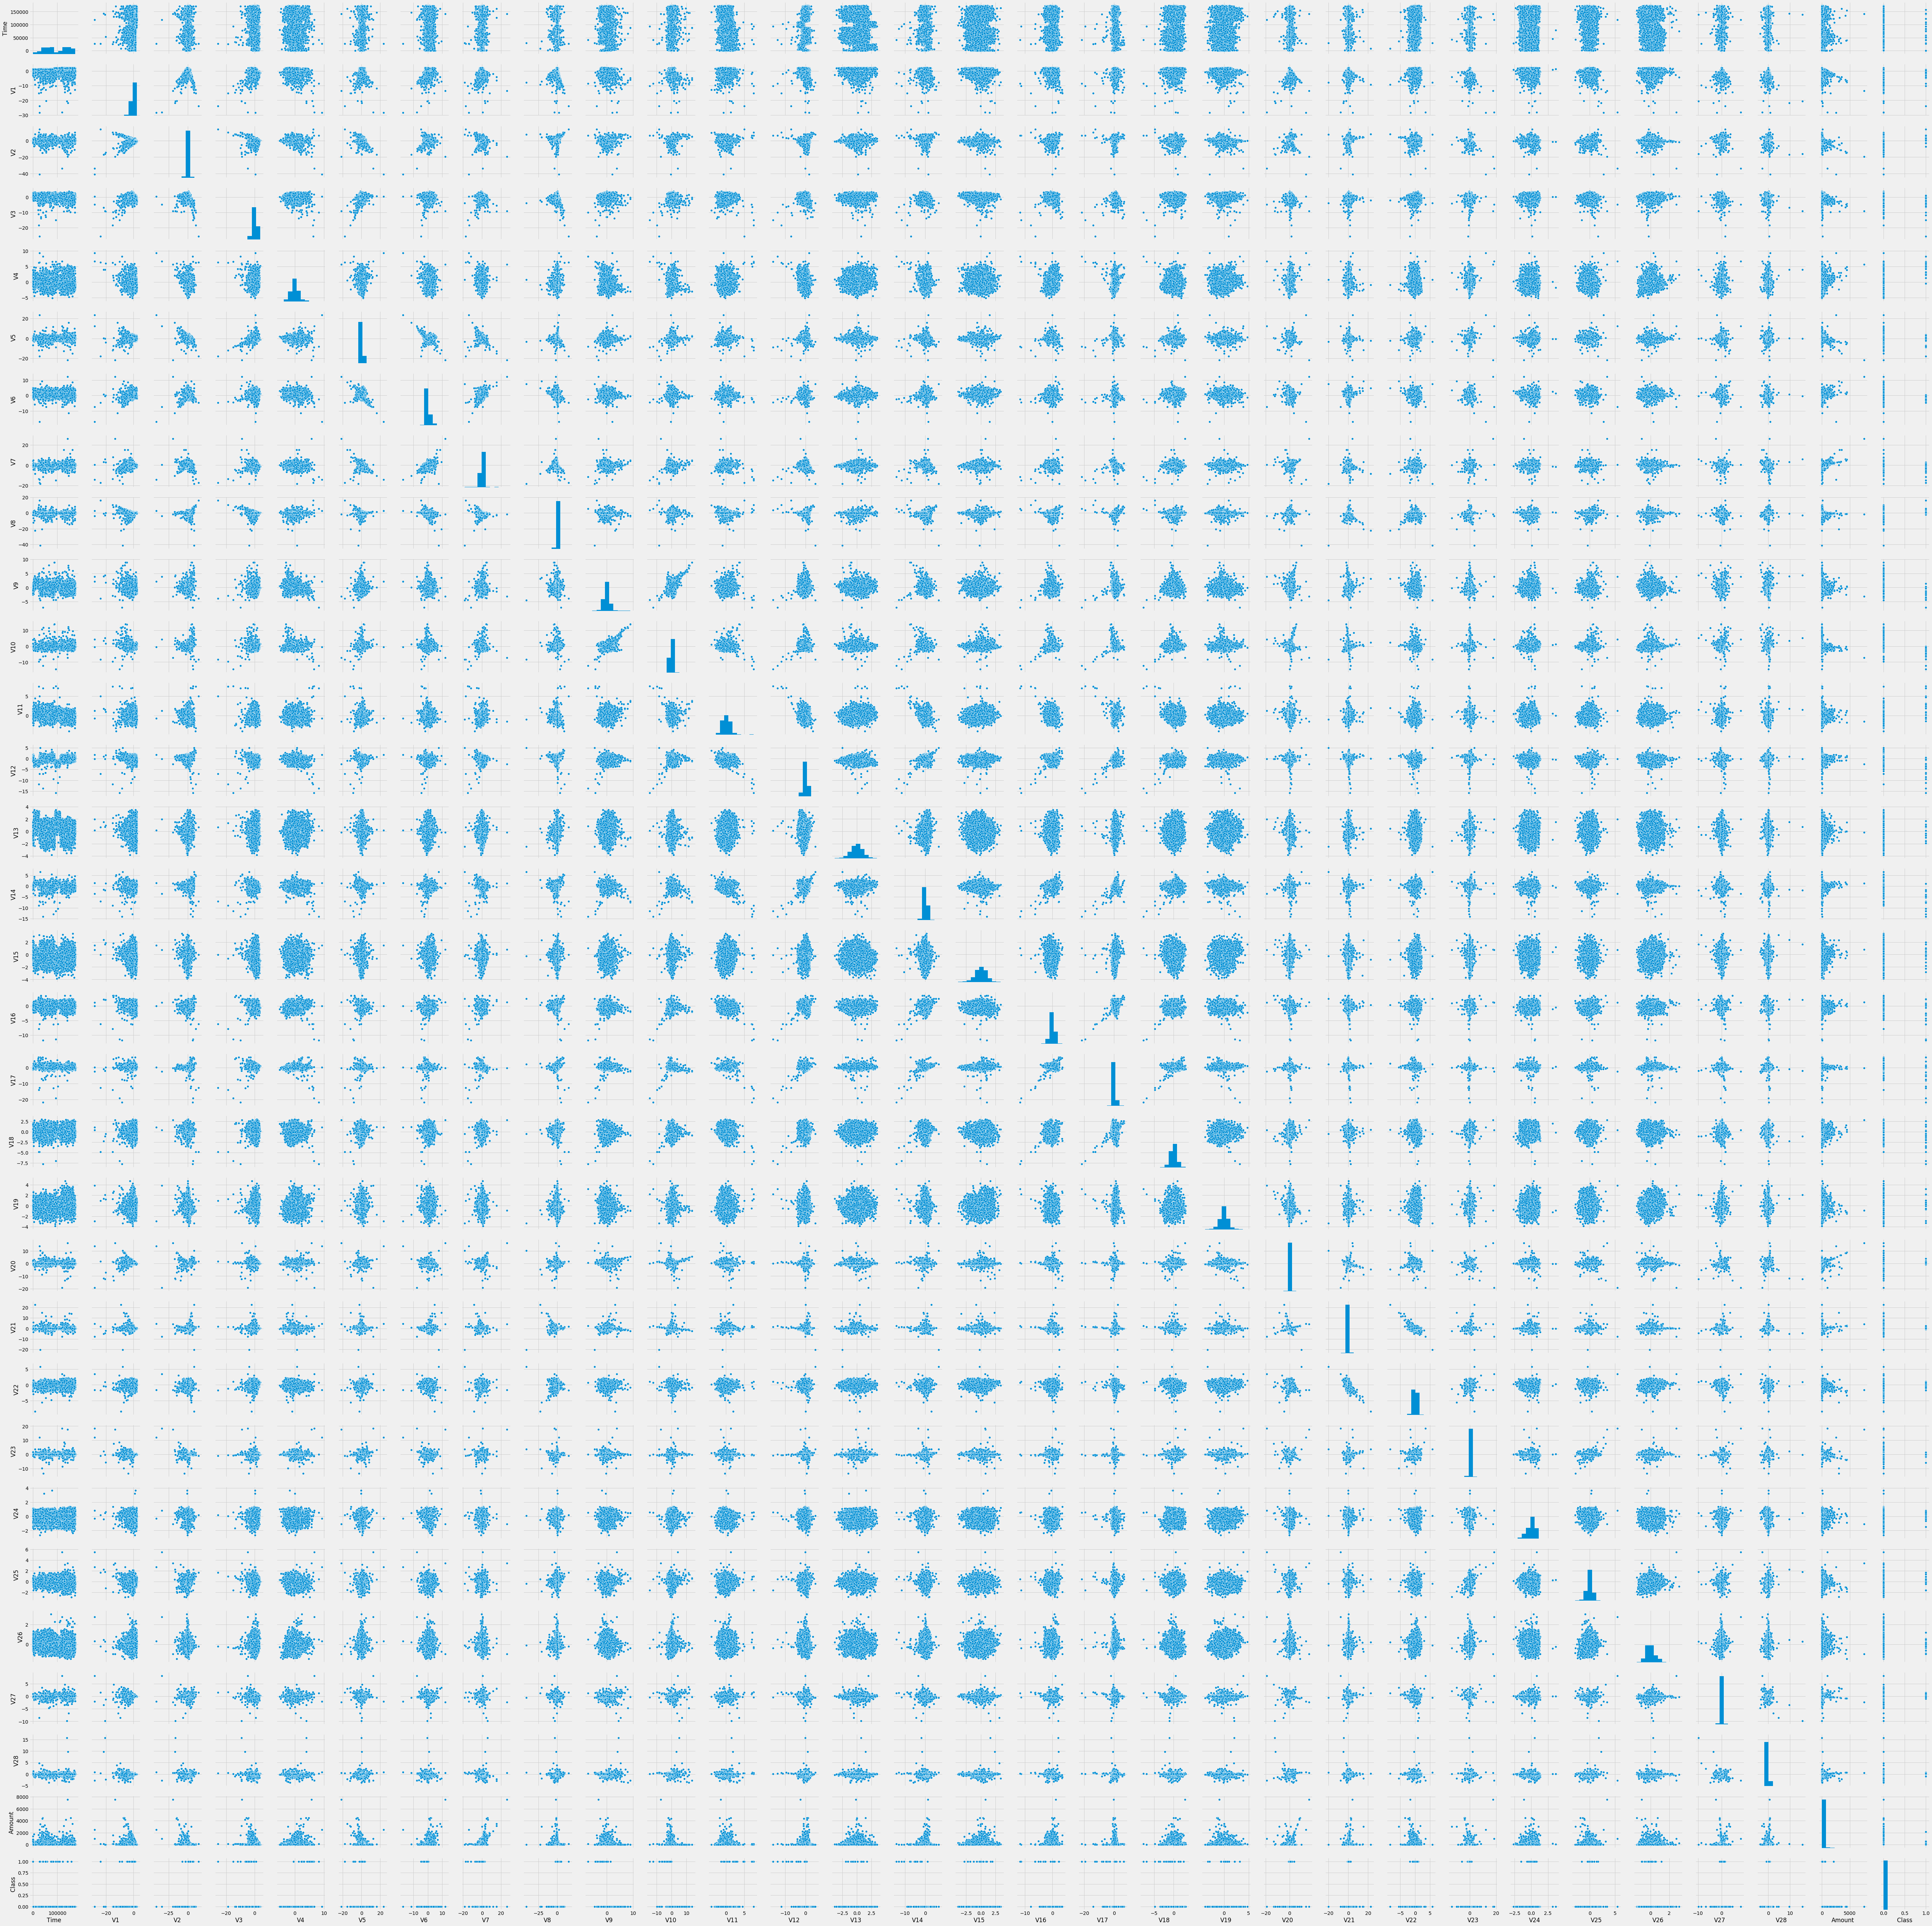

In [69]:
smp = np.random.randint(0, df.shape[0], size=int(1e4))
plt.figure(figsize=(30, 30))
sns.pairplot(df.loc[smp]);

## Class distribution

In [109]:
neg_ind = df['Class'] == 0
pos_ind = df['Class'] == 1
negative = df[neg_ind]
positive = df[pos_ind]
print('Non-fraudulent count: {0}'.format(np.sum(neg_ind), 4))
print('Non-fraudulent {0}%'.format(np.round(np.mean(neg_ind) * 100, 4)))
print()
print('Fraud count: {0}'.format(np.sum(pos_ind), 4))
print('Fraud {0}%'.format(np.round(np.mean(pos_ind) * 100, 4)))

Non-fraudulent count: 284315
Non-fraudulent 99.8273%

Fraud count: 492
Fraud 0.1727%


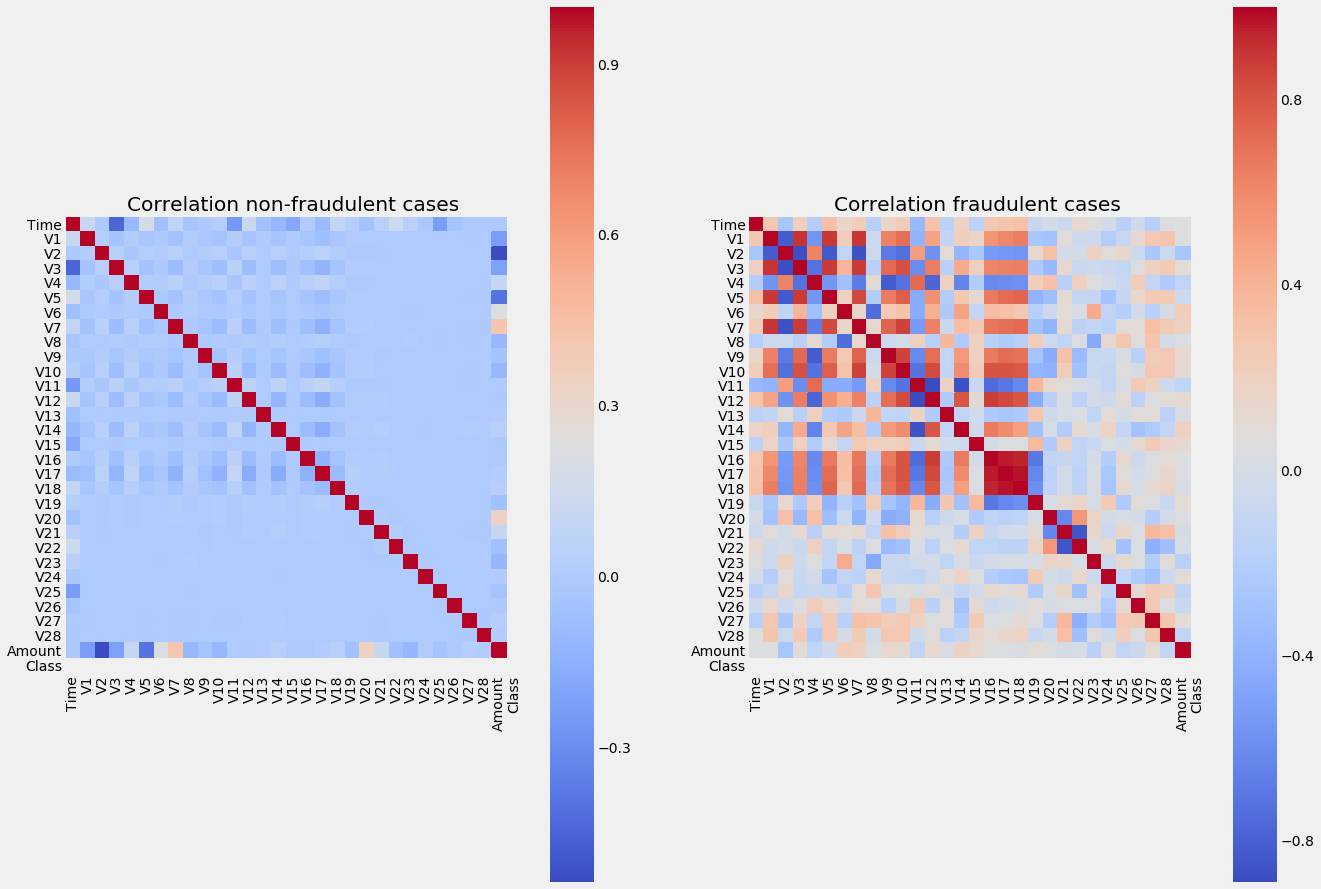

In [155]:
fig, ax = plt.subplots(1, 2, figsize=(20, 15))

sns.heatmap(negative.corr(), cbar = True,  square = True, annot=False, fmt= '.2f',
            cmap= 'coolwarm', ax=ax[0])
sns.heatmap(positive.corr(), cbar = True,  square = True, annot=False, fmt= '.2f',
            cmap= 'coolwarm', ax=ax[1]);
ax[0].set_title('Correlation non-fraudulent cases');
ax[1].set_title('Correlation fraudulent cases');

In [153]:
neg_cor = negative.drop('Class', 1).corr()
neg_cor[neg_cor == 1] = 0
pos_cor = positive.drop('Class', 1).corr()
pos_cor[pos_cor == 1] = 0

In [154]:
cor_max_min = df.iloc[:4, :-1].copy()
cor_max_min.index = ['Neg - Max', 'Neg - Min', 'Pos - Max', 'Pos - Min']
cor_max_min.loc['Neg - Max'] = neg_cor.max().values
cor_max_min.loc['Neg - Min'] = neg_cor.min().values
cor_max_min.loc['Pos - Max'] = pos_cor.max().values
cor_max_min.loc['Pos - Min'] = pos_cor.min().values
cor_max_min

Time        V1        V2        V3        V4        V5  \
Neg - Max  0.172963  0.116489  0.057156  0.045074  0.099802  0.172963   
Neg - Min -0.441001 -0.231250 -0.536546 -0.441001 -0.104329 -0.392782   
Pos - Max  0.320502  0.907875  0.629688  0.907875  0.721682  0.894968   
Pos - Min -0.354721 -0.819226 -0.876904 -0.876904 -0.818853 -0.828391   

                 V6        V7        V8        V9    ...          V20  \
Neg - Max  0.216433  0.416628  0.029335  0.022045    ...     0.340429   
Neg - Min -0.064131 -0.141877 -0.106694 -0.062855    ...    -0.050802   
Pos - Max  0.480686  0.897609  0.378451  0.863966    ...     0.534961   
Pos - Min -0.743021 -0.862983 -0.743021 -0.818853    ...    -0.630382   

                V21       V22       V23       V24       V25       V26  \
Neg - Max  0.108597  0.144257  0.051167  0.005070  0.002455  0.003811   
Neg - Min -0.012891 -0.065120 -0.112598 -0.016259 -0.233290 -0.041353   
Pos - Max  0.378642  0.534961  0.441265  0.252835  0.278903  0.256473   
Pos - Min -0.852112 -0.852112 -0.449208 -0.295395 -0.302208 -0.293947   

                V27       V28    Amount  
Neg - Max  0.028465  0.010589  0.416628  
Neg - Min -0.012891 -0.009442 -0.536546  
Pos - Max  0.378642  0.322953  0.228130  
Pos - Min -0.422951 -0.319007 -0.272762  

[4 rows x 30 columns]